# understanding neural network in simple steps

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression

# Loading Diabetes Dataset 

In [22]:
# load the dataset for
data = pd.read_csv("C:/Users/mahes/OneDrive/Desktop/diabetes.csv")

In [23]:
# viewring data
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome'>

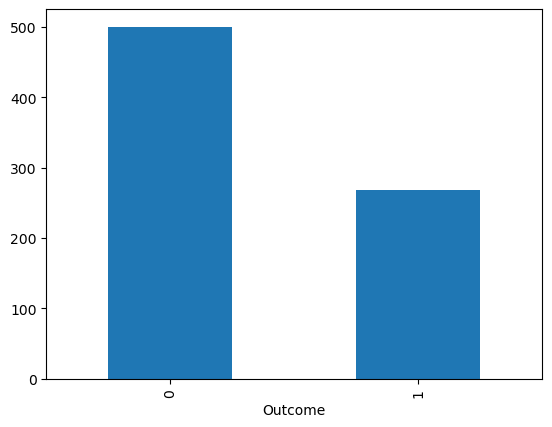

In [24]:
import seaborn as sns
data['Outcome'].value_counts().plot(kind = 'bar')

# Preparing Data for modelling

In [25]:
# split into input (X) and output (Y) variables
predictors = data.iloc[:,0:8]
response = data.iloc[:,8]

In [26]:
#create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(predictors, 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


# Trainig the neural network model         
there are two ways to build Keras models: Sequential and functional

the sequential API allows you to create models layer-by-layer


In [27]:
 #define the keras model - layer by layer
kerasmodel = Sequential() #initializing model - dense for fully connected layer
kerasmodel.add(Dense(12, input_dim=8, activation='relu'))
kerasmodel.add(Dense(8, activation='relu'))
kerasmodel.add(Dense(1, activation='sigmoid'))

In [28]:
kerasmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
kerasmodel.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 3ms/step - loss: 5.7530 - accuracy: 0.6221
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 2.1792 - accuracy: 0.6173
Epoch 3/150
62/62 [==============================] - 0s 3ms/step - loss: 0.9400 - accuracy: 0.6254
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7998 - accuracy: 0.6498
Epoch 5/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7634 - accuracy: 0.6515
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7937 - accuracy: 0.6270
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.6564
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6694
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7273 - accuracy: 0.6564
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6677 - accuracy: 0.6759
Epoch 11/

62/62 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.7199
Epoch 84/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7378
Epoch 85/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7410
Epoch 86/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.7182
Epoch 87/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.7296
Epoch 88/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7443
Epoch 89/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.7443
Epoch 90/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7459
Epoch 91/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7476
Epoch 92/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7476
Epoch 93/150


In [30]:
# train accuracy 
_, accuracy = kerasmodel.evaluate(X_train, y_train)
print('Train Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7769
Train Accuracy: 77.69


In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\mahes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7467532467532467
